In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

In [ ]:
df = pd.read_csv('../../data/varios/melbourne.csv')
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
profile = profile_report(df, title='Pandas Profiling Report')
profile


In [ ]:
df.isnull().sum()


In [ ]:
sns.displot(data=df, x='Price')
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
df['Price'].fillna(df['Price'].median(),inplace=True)
sns.histplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.xlim(0, 4000000)



In [ ]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x='Price')
sns.rugplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='Bathroom')


In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='Bedroom2')

In [ ]:
def calc_missing(df):
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        total_count = df.shape[0]
        null_percentage = (null_count/ total_count) * 100
        print(f'{col} {null_count}/ {total_count} = {null_percentage:.2f} % missing values')
        
calc_missing(df)

In [ ]:
sns.boxplot(data=df, x='BuildingArea')

In [ ]:
df['BuildingArea'].fillna(0, inplace=True)
sns.boxplot(data=df, x='BuildingArea')

In [ ]:
df['BuildingArea'].fillna(0, inplace=True)
sns.boxenplot(data=df, x='BuildingArea')

In [ ]:
calc_missing(df)

In [ ]:
sns.boxplot(data=df, x='Bedroom2')

In [ ]:
df['Bedroom2'].fillna(df['Bedroom2'].mode()[0], inplace=True)

In [ ]:
df[['Rooms', 'Bedroom2']].tail(40)

In [ ]:
#BORRAR COLUMNA Bedroom2
df.drop('Bedroom2', axis=1, inplace=True)

In [ ]:
df.head()

# ANALISIS BIVARANTE

In [ ]:
# Bathroom con: Rooms, Price, Car
sns.scatterplot(data=df, x='Bathroom', y='Rooms')

In [ ]:
sns.boxplot(data=df, x='Bathroom', y='Price')

In [ ]:
sns.boxplot(data=df, x='Bathroom', y='Car')

In [ ]:
sns.pointplot(data=df, x='Bathroom', y='Rooms', errorbar=None)

In [ ]:
sns.barplot(data=df, x='Bathroom', y='Price', errorbar=None, palette='viridis')

In [ ]:
# plt.figure(figsize=(10, 8))
# filter = (df['Bathroom'] == 1) | (df['Bathroom'] == 3)
# filter = df['Bathroom'].between(0,3)
filter = df['Bathroom'] == 2
sns.violinplot(data=df[filter], x='Bathroom', y='Price')

In [ ]:
# calcular el precio medio por Bathroom
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price ,x='Bathroom', y='Price')

In [ ]:
# filtrar lo que tengan más de 7 baños
filter = df['Bathroom'] > 7
df_8_bath = df[filter]
df_8_bath.shape # Hay 5 casas de más de 7 baños

In [ ]:
# excluir las que tengan más de 7 baños
filter = df['Bathroom'] <= 7
df_8_bath = df[filter]
df_8_bath.shape

In [ ]:
# borrar las que tengan más de 7 baños
filter = df['Bathroom'] > 7
print(df.shape)
df.drop(df[filter].index, inplace=True) # Borra las filas
print(df.shape)

In [ ]:
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price ,x='Bathroom', y='Price')

In [ ]:
# imputar valores nulos en Bathroom
filter = df['Bathroom'].isnull()
print(df[filter].index)

for i in df[filter].index:
    pass

# ANALISIS MULTIVARIANTE

In [ ]:
sns.pairplot(df[['Bathroom', 'Price', 'Car', 'Rooms', 'Landsize']])

In [ ]:
plt.figure(figsize=(12,5), dpi=300)
import numpy as np
df_corr = df.corr()
filter = np.triu(df_corr) 
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter, fmt=".2f");

# RELLENAR VALORES FALTANTES

In [ ]:
# imputar valores nulos en Bathroom basándonos en la columna Rooms por ser la más correlacionada con Bathroom
filter1 = df['Bathroom'].isnull()

for i in df[filter1].index:
    filter2 = df['Rooms'] == df.loc[i, 'Rooms']
    median = df.loc[filter2, 'Bathroom'].median()

    if not pd.isnull(median):
        df.loc[i, 'Bathroom'] = median
    else:
        df.loc[i, 'Bathroom'] = df['Bathroom'].median()

In [ ]:
df['Bathroom'] = df['Bathroom'].round().astype(int)
df['Bathroom'].value_counts()

In [ ]:
from geopy.geocoders import Nominatim

address = '68 Studley St Abbotsford'

geolocator = Nominatim(user_agent='Nirvana')
location = geolocator.geocode(address)

print(location.latitude, location.longitude)


<Axes: xlabel='Longtitude', ylabel='Lattitude'>

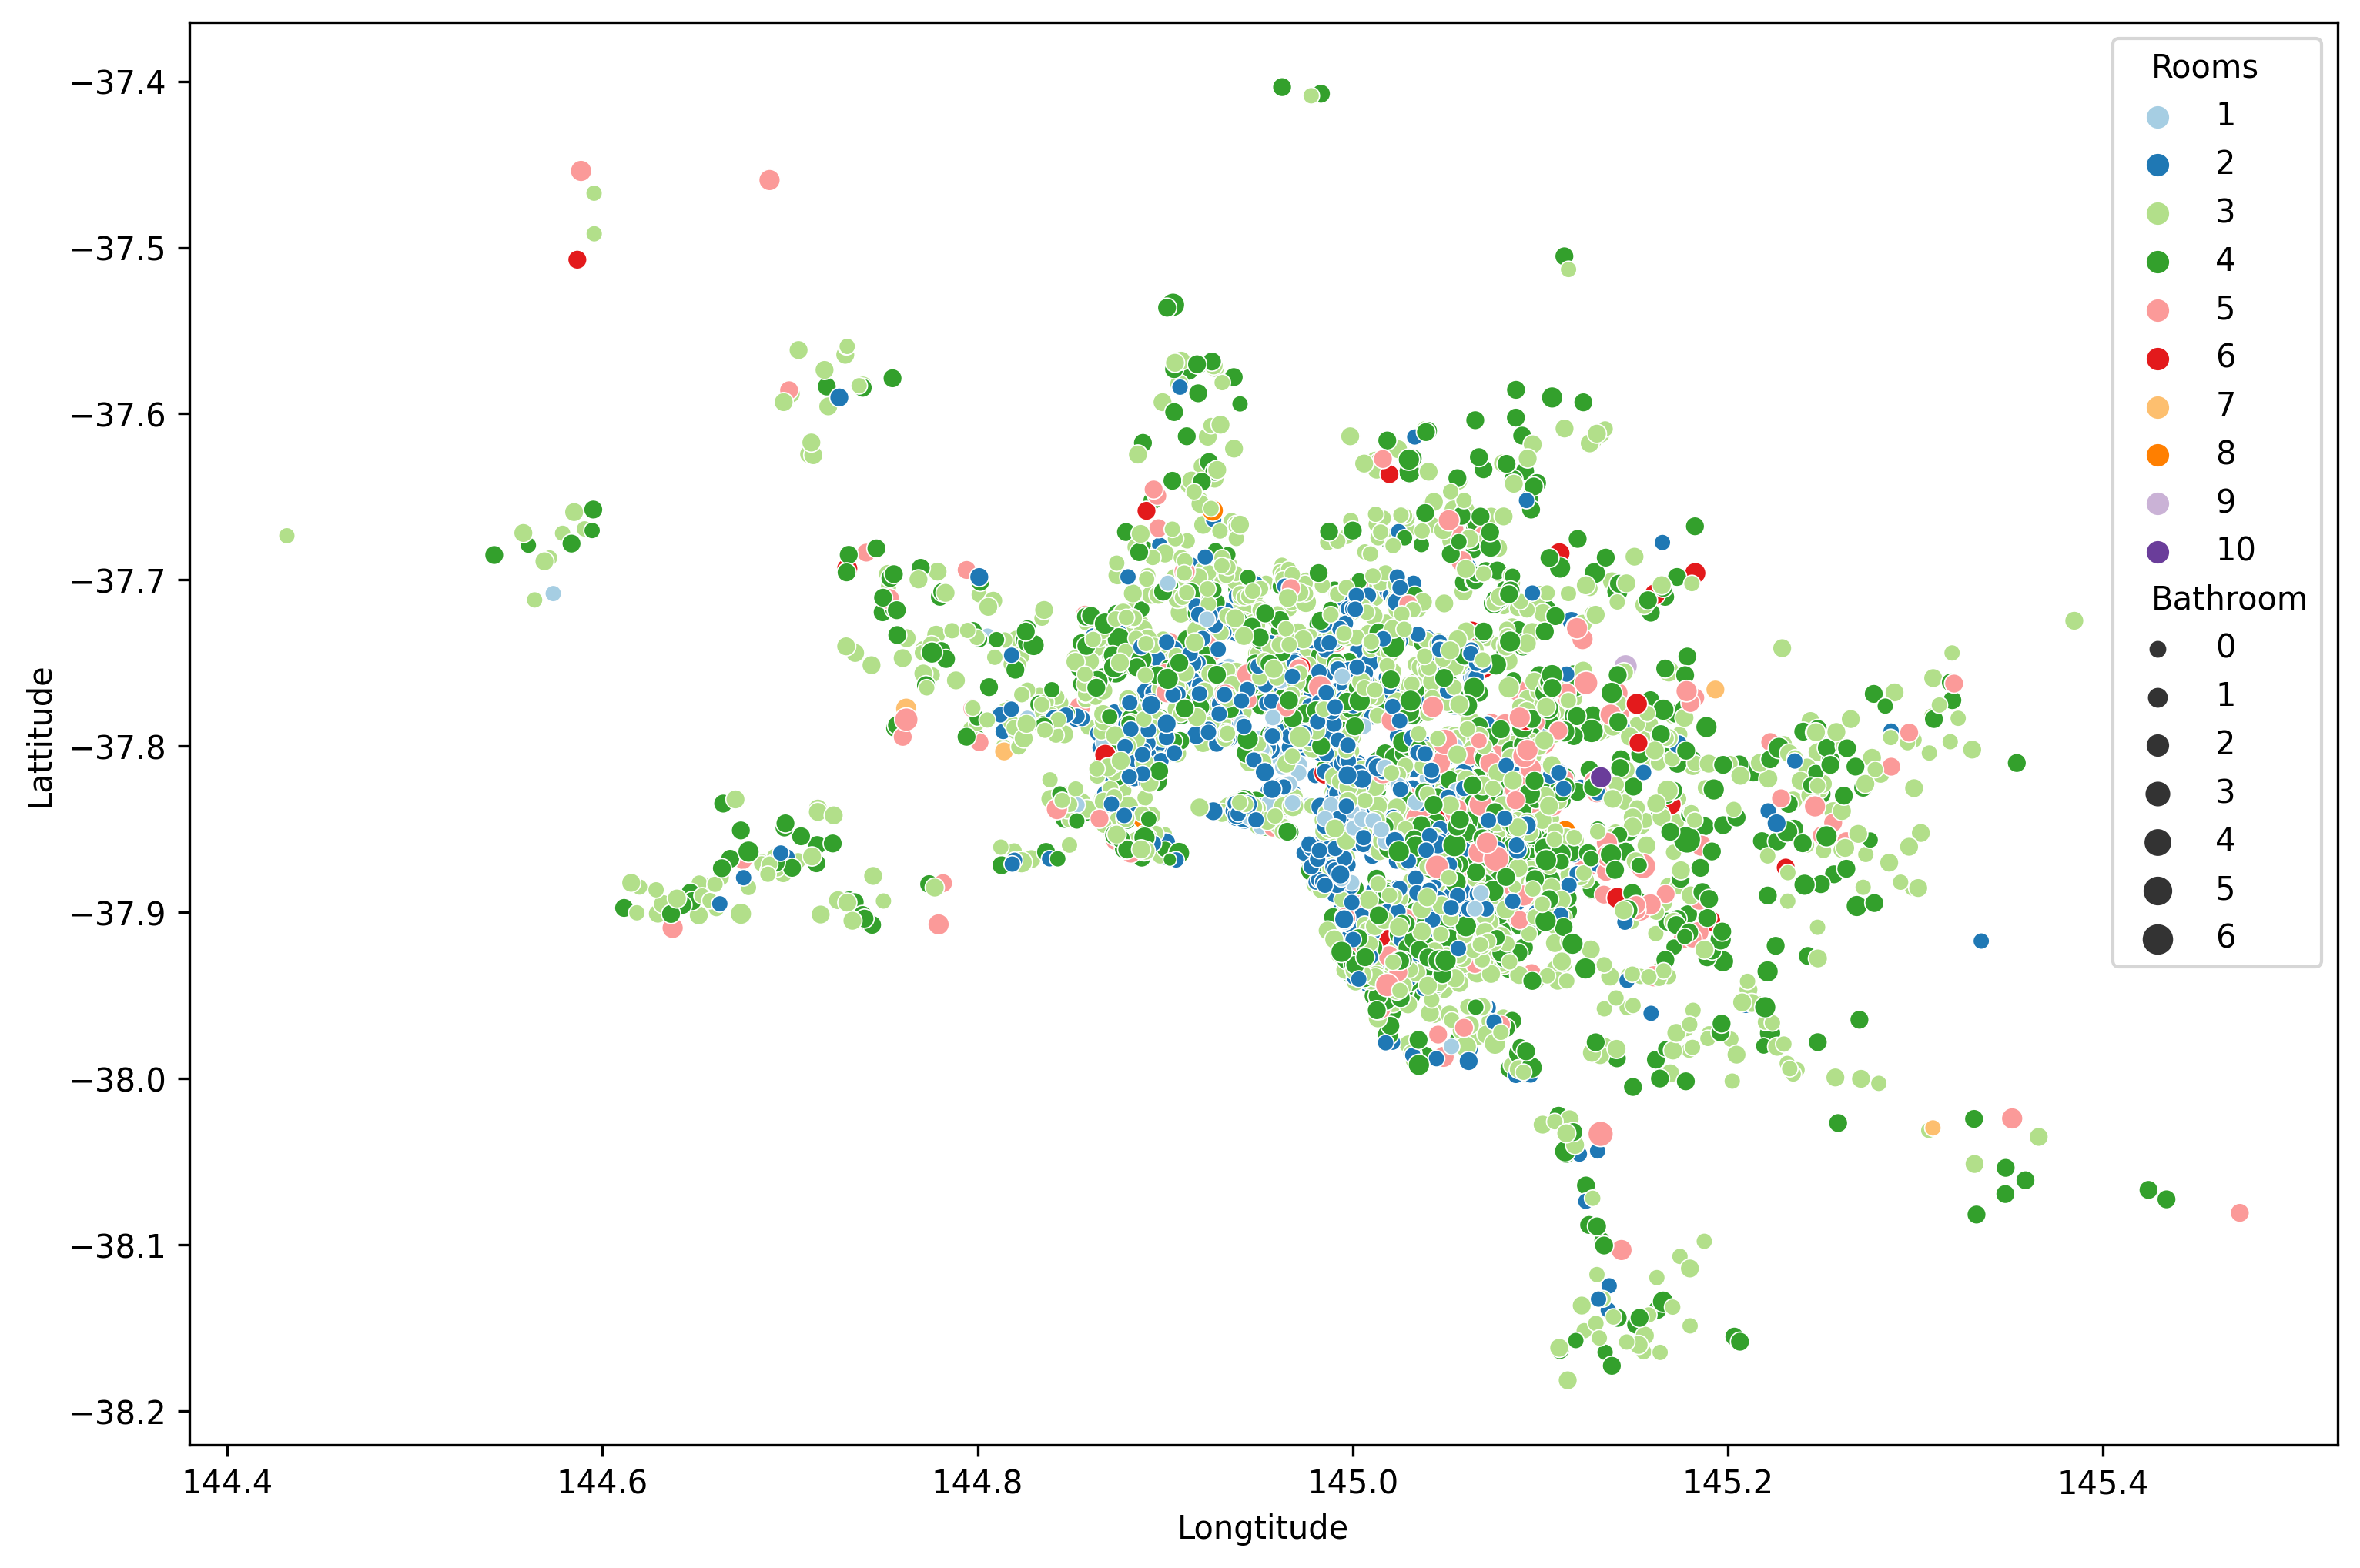

In [18]:
plt.figure(figsize=(12,8), dpi=300)
sns.scatterplot(data=df.sample(5000),
                x='Longtitude', y='Lattitude', hue='Rooms', palette='Paired', size='Bathroom')